# DEPENDENCIES

In [3]:
!pip install easyocr
!pip install pytesseract

     |████████████████████████████████| 63.2MB 47kB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=f60cf4fff48874b81689303163c0347df692edd1497b325aa8e99efab7767fe8
  Stored in directory: /root/.cache/pip/wheels/a2/66/45/88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract


In [1]:
import cv2
import easyocr
import imutils
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import re
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# Reading image file

In [2]:
img = cv2.imread('image1.jpg',cv2.IMREAD_COLOR)
img = imutils.resize(img, width=500 )

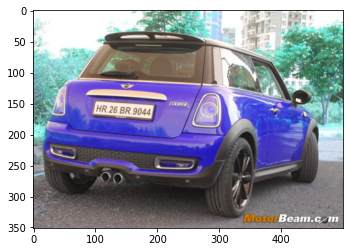

In [3]:
plt.imshow(img)

# grayscale conversion and performing noise reduction

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grey scale
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Blur to reduce noise

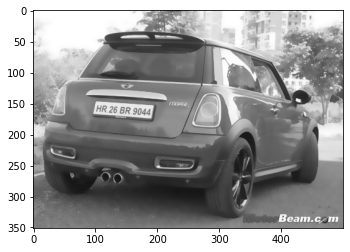

In [5]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Find edges for localization


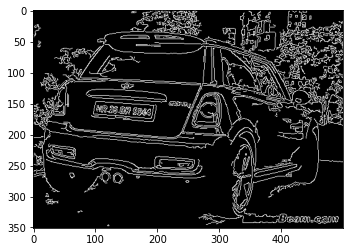

In [6]:
edged = cv2.Canny(gray, 30, 200) #Perform Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

#  Find Contours and Apply Mask

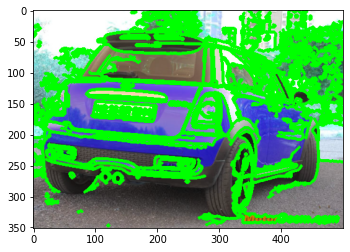

In [7]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
img1=img.copy()
cv2.drawContours(img1,cnts,-1,(0,255,0),3)
plt.imshow(img1)

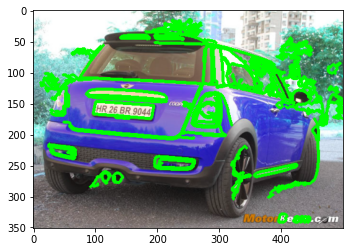

In [8]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
screenCnt = None #will store the number plate contour
img2 = img.copy()
cv2.drawContours(img2,cnts,-1,(0,255,0),3) 
plt.imshow(img2) #top 30 contours

In [9]:
count=0
idx=7
# loop over contours
for c in cnts:
  # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * peri, True)
        if len(approx) == 4: #chooses contours with 4 corners
                screenCnt = approx
                x,y,w,h = cv2.boundingRect(c) #finds co-ordinates of the plate
                new_img=img[y:y+h,x:x+w]
                cv2.imwrite('./'+str(idx)+'.png',new_img) #stores the new image
                idx+=1
                break
            #draws the selected contour on original image

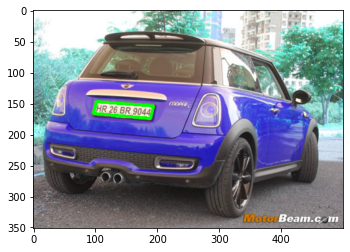

In [10]:
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
plt.imshow(img) # prints final image with plate detected

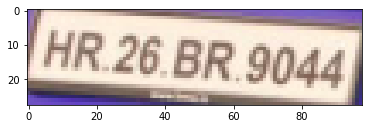

In [11]:
Cropped_loc='./7.png' #the filename of cropped image
plt.imshow(cv2.imread(Cropped_loc)) #cropped image of number plate

# Use Easy Tesseract To Read Text

In [13]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe" #exe file for using ocr 
text=pytesseract.image_to_string(Cropped_loc,lang='eng') #converts image characters to string
print("Number :" ,text)

Number : _ ai mee ae
HR 26. BR 9044]



In [16]:
reader=easyocr.Reader(['en'],gpu=True)
result=reader.readtext('7.png')
print(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [98, 0], [98, 26], [0, 26]], '[HR 26 BR 9044', 0.4944812139182453)]


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [17]:
result

[([[0, 0], [98, 0], [98, 26], [0, 26]], '[HR 26 BR 9044', 0.4944812139182453)]

In [20]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [21]:
text

'[HR 26 BR 9044'

In [34]:
text1=re.sub('[^A-Za-z0-9]+', '', text)
text1

'HR26BR9044'